Laptop price prediction

https://www.kaggle.com/competitions/laptop-price-prediction/data?select=test.csv

## 라이브러리 로드

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 로드

In [71]:
train = pd.read_csv("data/laptop/train.csv", index_col="Id")
print(train.shape)
train.head(2)

(950, 11)


,Fabricante,Tipo,Pulgadas,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso,Precio
Id,,,,,,,,,,,
0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.84kg,747.0
1,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce MX150,Windows 10,2.2kg,422.0


In [72]:
test = pd.read_csv("data/laptop/test.csv", index_col="Id")
print(test.shape)
test.head(2)

(350, 10)


,Fabricante,Tipo,Pulgadas,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso
Id,,,,,,,,,,
950,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,Intel HD Graphics 520,Linux,2kg
951,HP,Notebook,15.6,1366x768,AMD E-Series 7110 1.8GHz,4GB,500GB HDD,AMD Radeon R2 Graphics,Windows 10,1.86kg


In [73]:
set(train.columns)-set(test.columns)

{'Precio'}

In [74]:
sub = pd.read_csv("data/laptop/sample.csv", index_col="Id")
sub = sub.drop(columns="Unnamed: 0")
print(sub.shape)
sub.head(2)

(350, 1)


,Precio
Id,
950,689.108462
951,689.108462


## 데이터 탐색

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 949
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fabricante        950 non-null    object 
 1   Tipo              950 non-null    object 
 2   Pulgadas          950 non-null    float64
 3   ScreenResolution  950 non-null    object 
 4   CPU               950 non-null    object 
 5   RAM               950 non-null    object 
 6   Disco             950 non-null    object 
 7   GPU               950 non-null    object 
 8   OS                950 non-null    object 
 9   Peso              950 non-null    object 
 10  Precio            950 non-null    float64
dtypes: float64(2), object(9)
memory usage: 89.1+ KB


In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 950 to 1299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fabricante        350 non-null    object 
 1   Tipo              350 non-null    object 
 2   Pulgadas          350 non-null    float64
 3   ScreenResolution  350 non-null    object 
 4   CPU               350 non-null    object 
 5   RAM               350 non-null    object 
 6   Disco             350 non-null    object 
 7   GPU               350 non-null    object 
 8   OS                350 non-null    object 
 9   Peso              350 non-null    object 
dtypes: float64(1), object(9)
memory usage: 30.1+ KB


## 기술통계

In [77]:
train.describe()

,Pulgadas,Precio
count,950.000000,950.000000
mean,14.974421,684.927368
std,1.451727,408.872239
min,10.100000,107.000000
25%,14.000000,379.000000
50%,15.600000,603.000000
75%,15.600000,912.000000
max,18.400000,3368.000000


## histplot

<AxesSubplot:xlabel='Id', ylabel='Precio'>

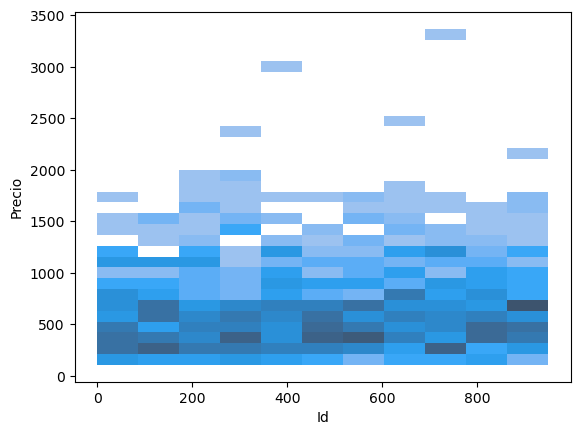

In [78]:
sns.histplot(data=train, x=train.index, y="Precio")

In [79]:
train[train["Precio"] > 2500]

,Fabricante,Tipo,Pulgadas,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso,Precio
Id,,,,,,,,,,,
370,Lenovo,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32GB,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.5kg,3000.0
708,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,3368.0


In [80]:
train = train[train["Precio"] < 2500].copy()
train.shape

(948, 11)

In [81]:
train["Peso"] = train["Peso"].str.replace("kg","")
train["Peso"].head()

Id
0    1.84
1     2.2
2     2.1
3     2.4
4    2.04
Name: Peso, dtype: object

In [82]:
train["Peso"] = train["Peso"].astype('float')
train["Peso"]

Id
0      1.84
1      2.20
2      2.10
3      2.40
4      2.04
       ... 
945    2.14
946    1.48
947    1.20
948    2.30
949    2.04
Name: Peso, Length: 948, dtype: float64

In [83]:
test["Peso"] = test["Peso"].str.replace("kg","")
test["Peso"].head()

Id
950       2
951    1.86
952     2.4
953     2.7
954    1.95
Name: Peso, dtype: object

In [84]:
test["Peso"] = test["Peso"].astype('float')
test["Peso"]

Id
950     2.00
951     1.86
952     2.40
953     2.70
954     1.95
        ... 
1295    2.19
1296    1.05
1297    1.91
1298    2.10
1299    2.00
Name: Peso, Length: 350, dtype: float64

In [85]:
train["RAM"] = train["RAM"].str.replace("GB","")
train["RAM"].head()

Id
0    8
1    8
2    4
3    4
4    6
Name: RAM, dtype: object

In [86]:
train["RAM"] = train["RAM"].astype('float')
train["RAM"]

Id
0      8.0
1      8.0
2      4.0
3      4.0
4      6.0
      ... 
945    8.0
946    4.0
947    8.0
948    8.0
949    8.0
Name: RAM, Length: 948, dtype: float64

In [87]:
test["RAM"] = test["RAM"].str.replace("GB","")
test["RAM"].head()

Id
950    4
951    4
952    8
953    8
954    4
Name: RAM, dtype: object

In [88]:
test["RAM"] = test["RAM"].astype('float')
test["RAM"]

Id
950     4.0
951     4.0
952     8.0
953     8.0
954     4.0
       ... 
1295    6.0
1296    8.0
1297    8.0
1298    4.0
1299    8.0
Name: RAM, Length: 350, dtype: float64

In [89]:
train.head()

,Fabricante,Tipo,Pulgadas,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso,Precio
Id,,,,,,,,,,,
0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8.0,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,747.0
1,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8.0,1TB HDD,Nvidia GeForce MX150,Windows 10,2.20,422.0
2,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4.0,500GB HDD,AMD Radeon 530,Windows 10,2.10,422.0
3,Acer,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4.0,500GB HDD,AMD Radeon R5,Windows 10,2.40,237.0
4,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6.0,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,337.0


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 949
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fabricante        948 non-null    object 
 1   Tipo              948 non-null    object 
 2   Pulgadas          948 non-null    float64
 3   ScreenResolution  948 non-null    object 
 4   CPU               948 non-null    object 
 5   RAM               948 non-null    float64
 6   Disco             948 non-null    object 
 7   GPU               948 non-null    object 
 8   OS                948 non-null    object 
 9   Peso              948 non-null    float64
 10  Precio            948 non-null    float64
dtypes: float64(4), object(7)
memory usage: 88.9+ KB


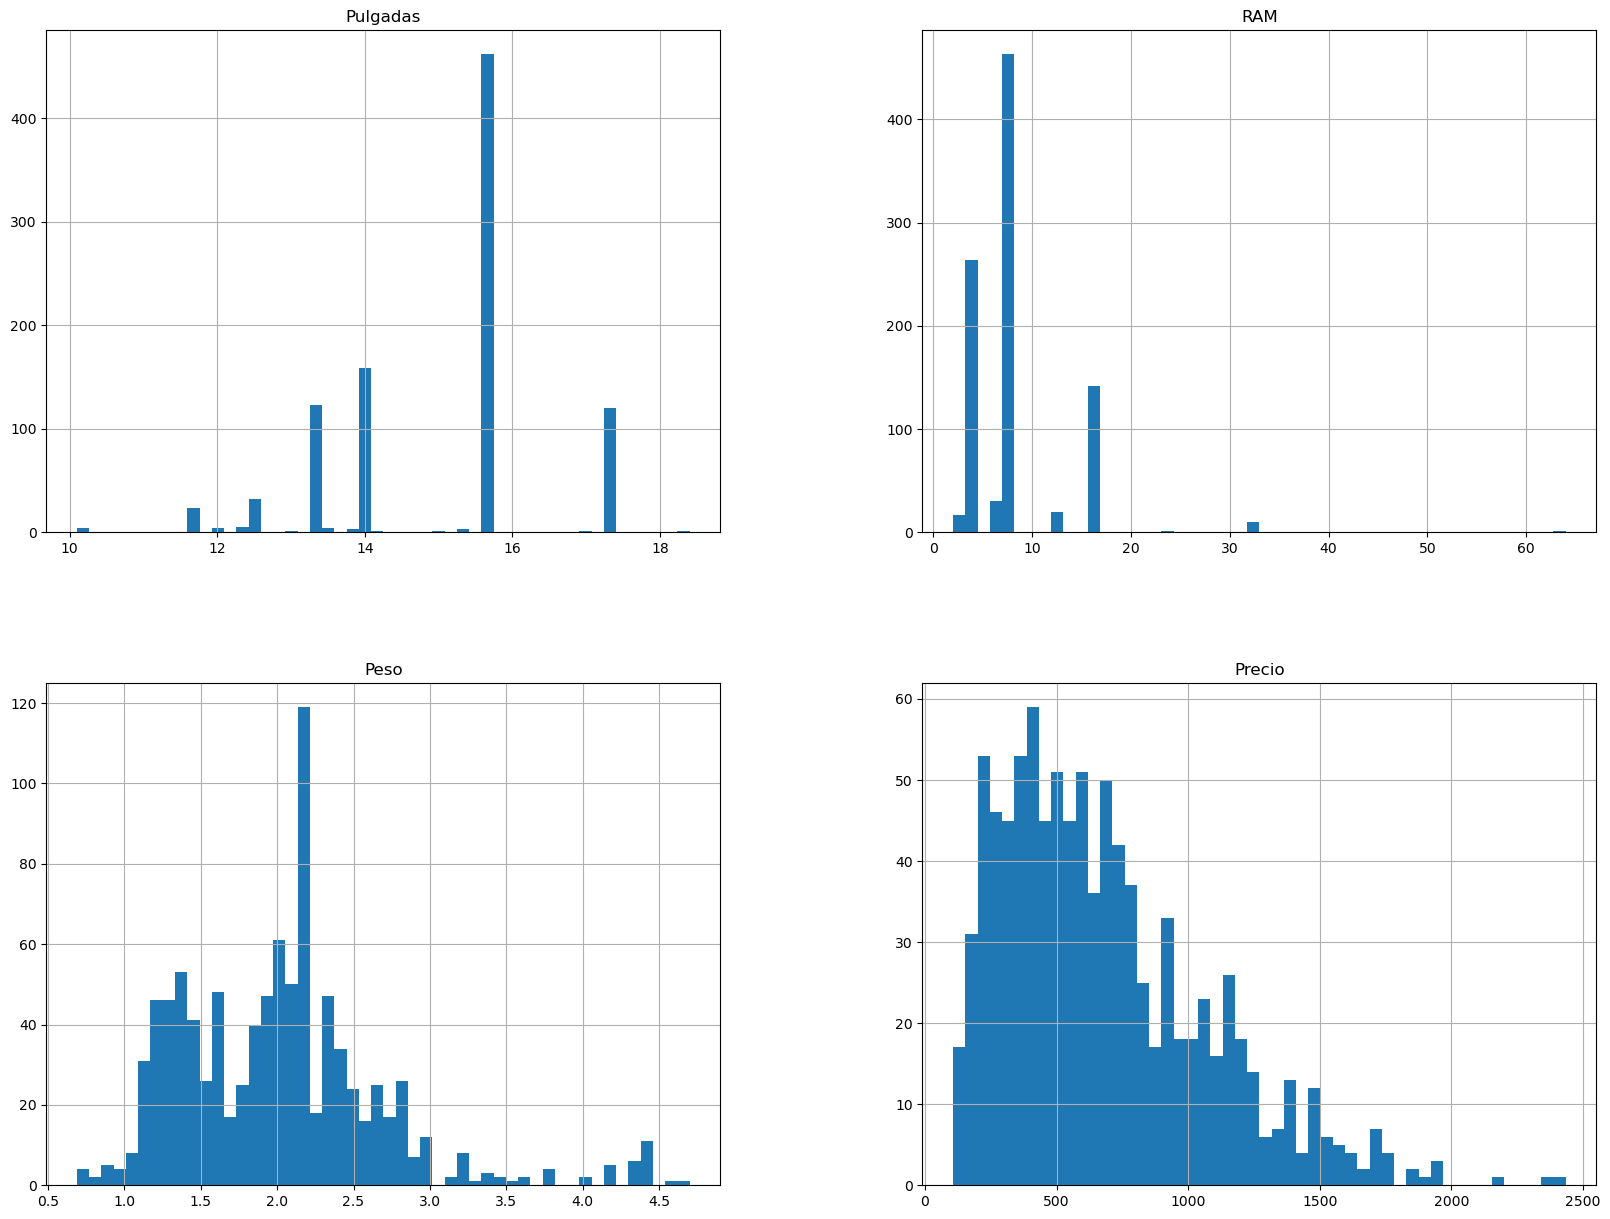

In [91]:
train.hist(figsize=(20,15), bins=50);

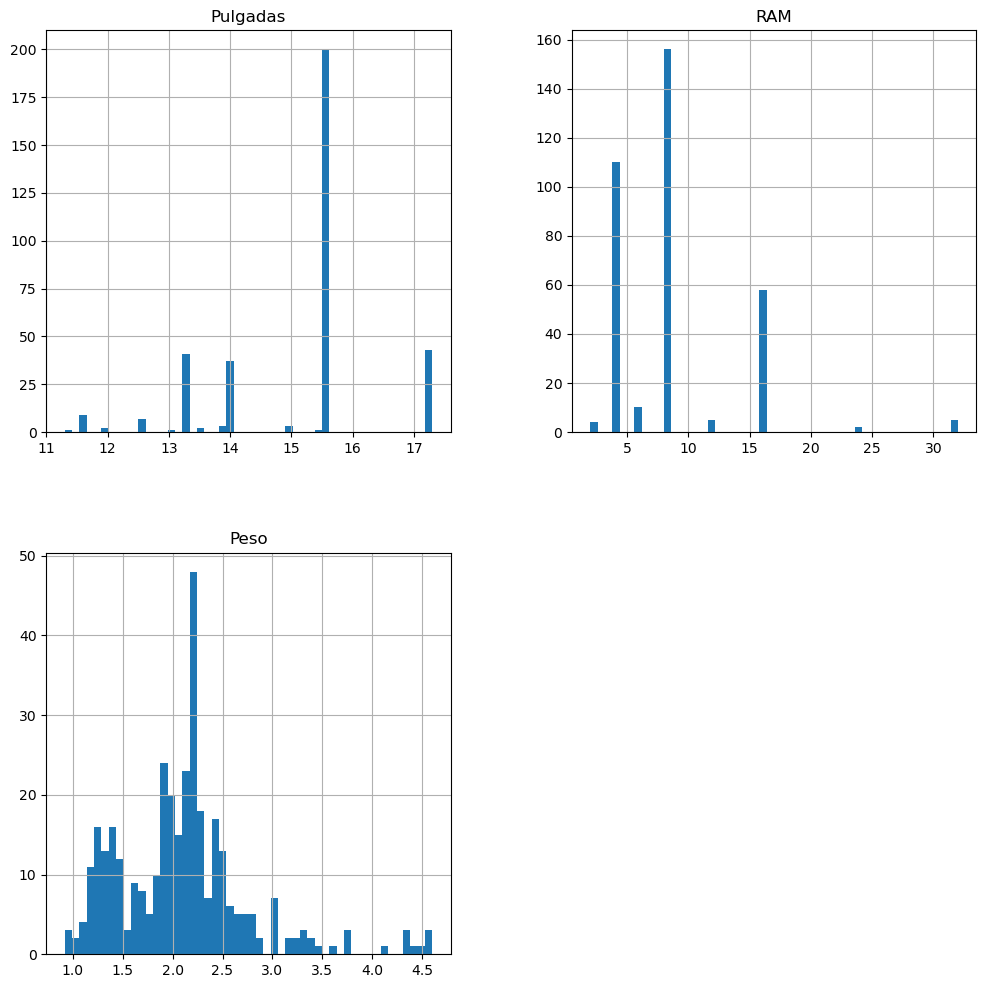

In [92]:
test.hist(figsize=(12,12), bins=50);

In [93]:
corr = train.corr()
corr

,Pulgadas,RAM,Peso,Precio
Pulgadas,1.000000,0.246864,0.834036,0.048318
RAM,0.246864,1.000000,0.381163,0.741111
Peso,0.834036,0.381163,1.000000,0.181207
Precio,0.048318,0.741111,0.181207,1.000000


In [94]:
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

<AxesSubplot:>

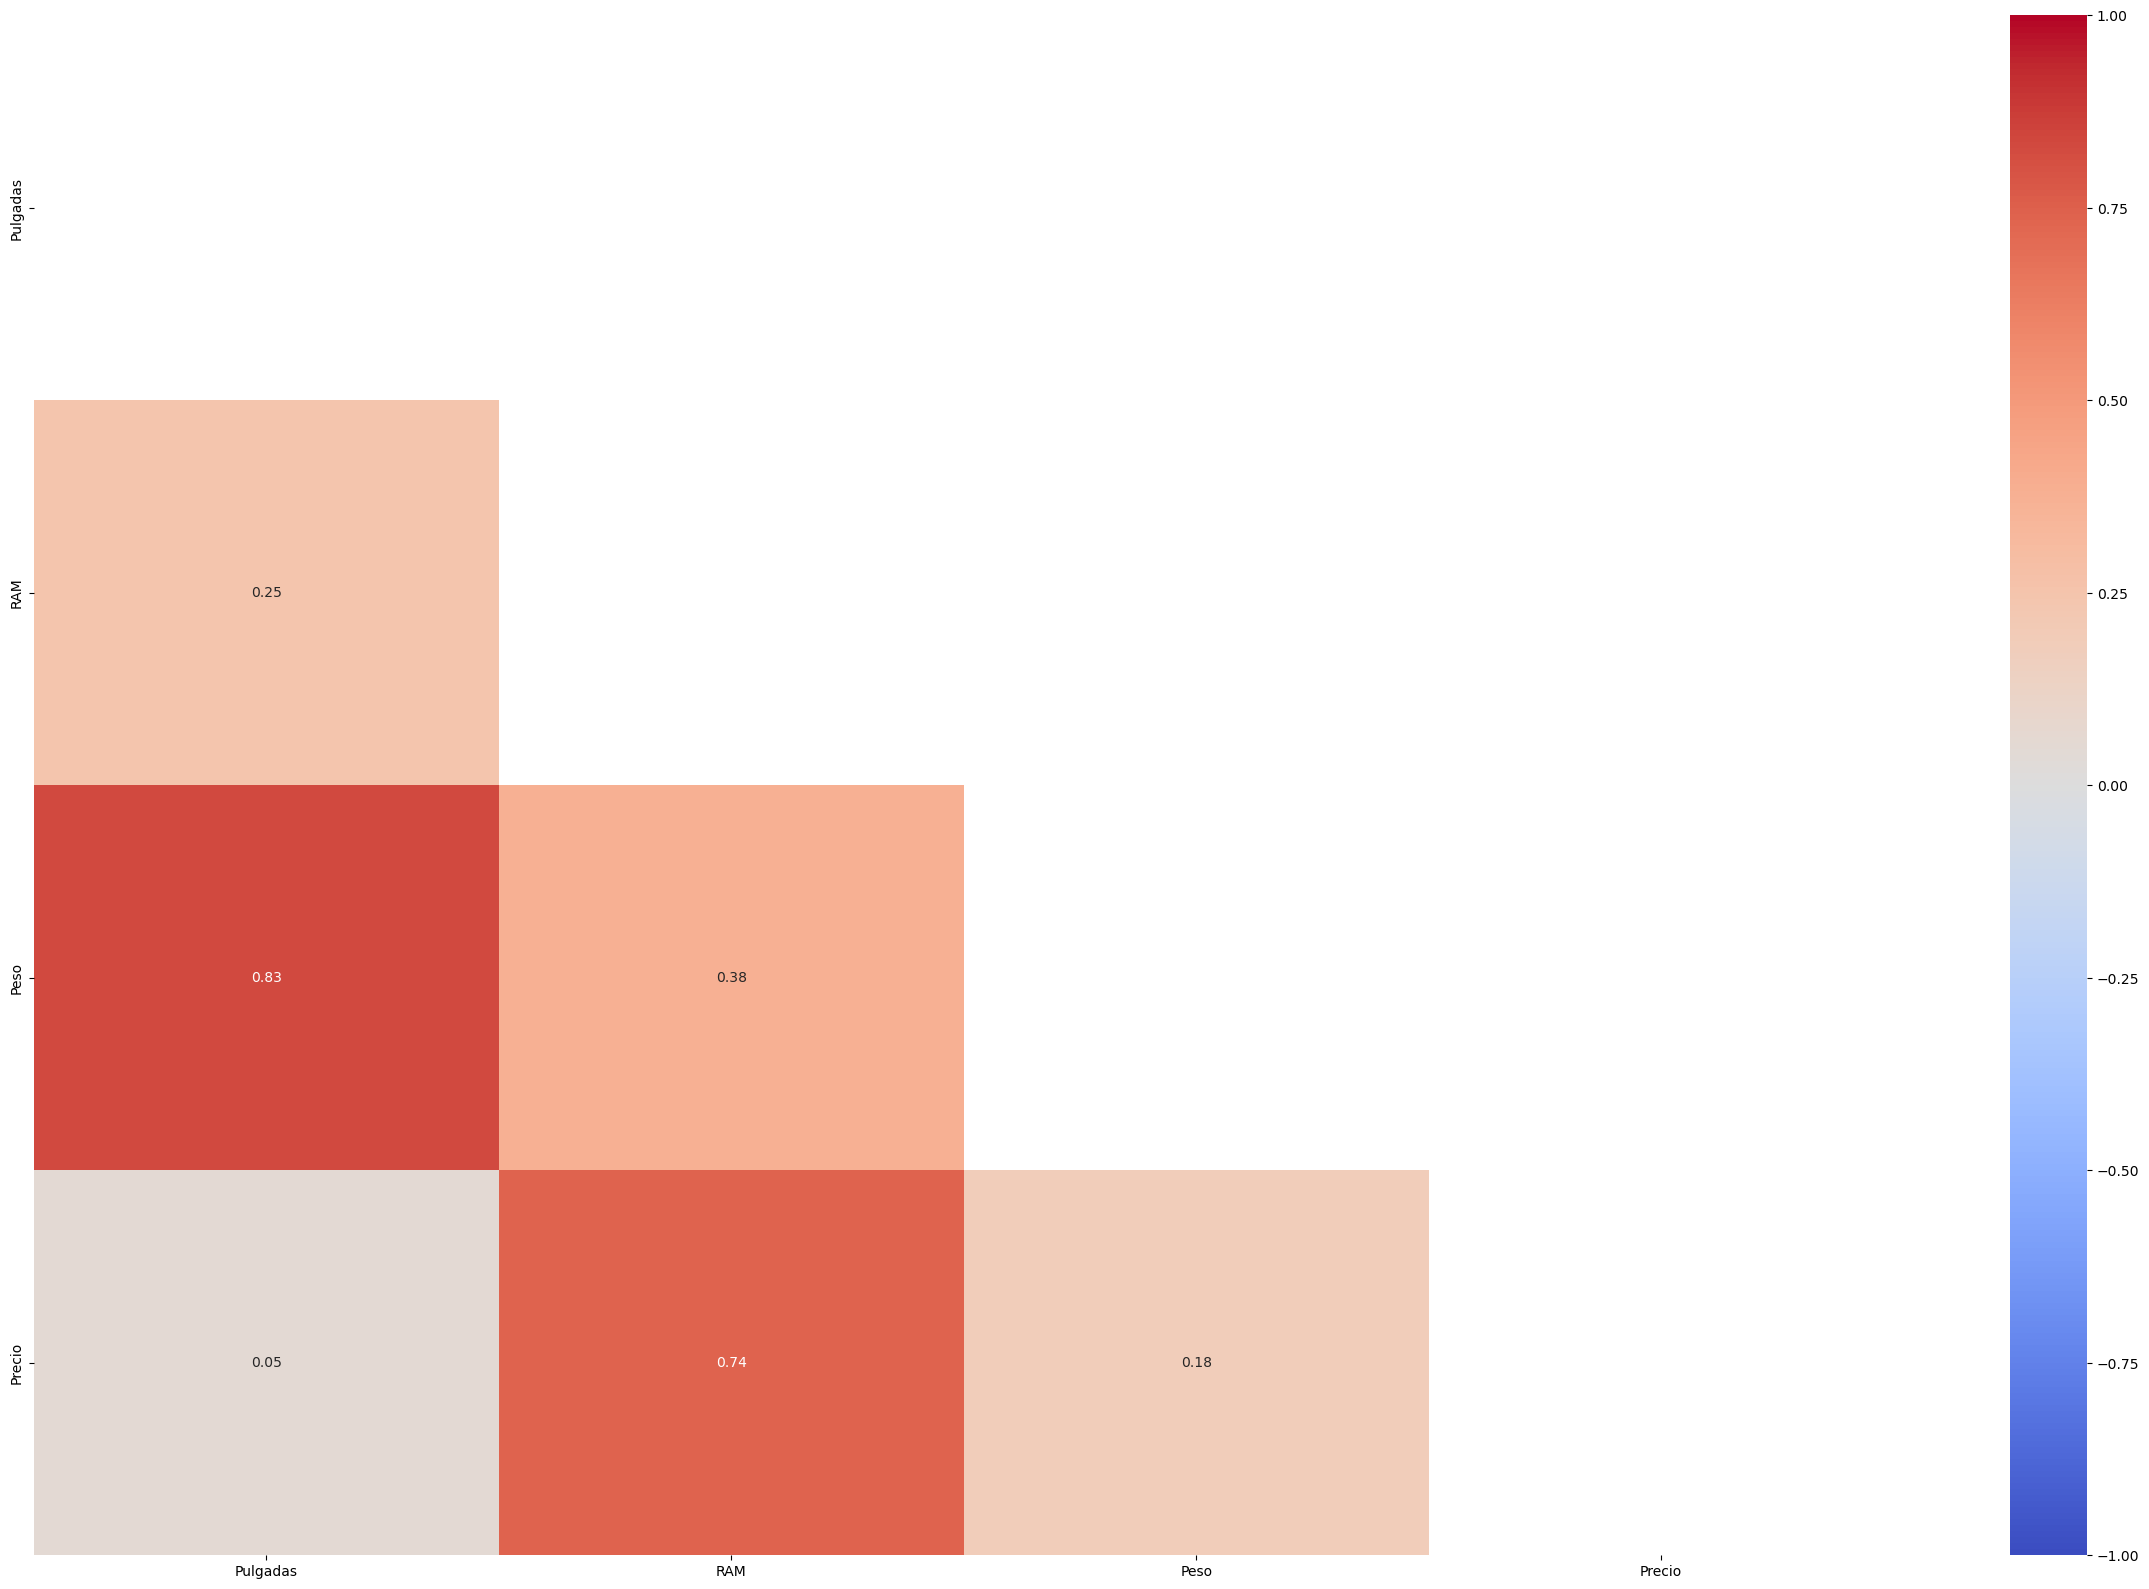

In [95]:
plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap="coolwarm", vmax=1, vmin=-1, fmt='.2f', annot=True, mask=mask)

## 변수 스케일링과 트랜스포메이션

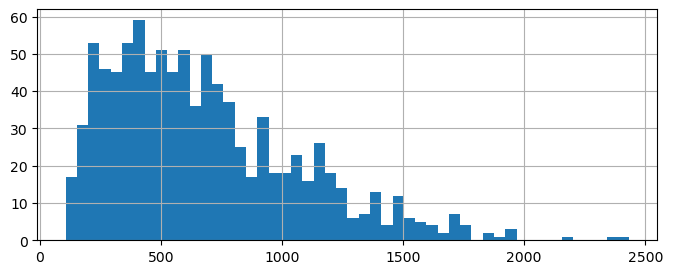

In [96]:
train["Precio"].hist(bins=50, figsize=(8,3));

In [97]:
train[["Precio"]]

,Precio
Id,
0,747.0
1,422.0
2,422.0
3,237.0
4,337.0
...,...
945,331.0
946,663.0
947,743.0


In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [99]:
ss = StandardScaler()
ss

StandardScaler()

In [100]:
train[["Precio_ss"]] = ss.fit(train[["Precio"]]).transform(train[["Precio"]])
train[["Precio", "Precio_ss"]].head(2)

,Precio,Precio_ss
Id,,
0,747.0,0.171567
1,422.0,-0.656400


In [101]:
mm = MinMaxScaler()
mm

MinMaxScaler()

In [102]:
train[["Precio_mm"]] = mm.fit(train[["Precio"]]).transform(train[["Precio"]])
train[["Precio", "Precio_mm"]].head(2)

,Precio,Precio_mm
Id,,
0,747.0,0.275032
1,422.0,0.135367


In [103]:
rs = RobustScaler()
rs

RobustScaler()

In [104]:
train[["Precio_rs"]] = rs.fit(train[["Precio"]]).transform(train[["Precio"]])
train[["Precio", "Precio_rs"]].head(2)

,Precio,Precio_rs
Id,,
0,747.0,0.274399
1,422.0,-0.338520


In [105]:
train[["Precio_rs"]] = rs.fit_transform(train[["Precio"]])
train[["Precio", "Precio_rs"]].head(2)

,Precio,Precio_rs
Id,,
0,747.0,0.274399
1,422.0,-0.338520


In [106]:
train[["Precio", "Precio_ss", "Precio_mm", "Precio_rs"]]

,Precio,Precio_ss,Precio_mm,Precio_rs
Id,,,,
0,747.0,0.171567,0.275032,0.274399
1,422.0,-0.656400,0.135367,-0.338520
2,422.0,-0.656400,0.135367,-0.338520
3,237.0,-1.127705,0.055866,-0.687412
4,337.0,-0.872946,0.098840,-0.498821
...,...,...,...,...
945,331.0,-0.888231,0.096261,-0.510137
946,663.0,-0.042430,0.238934,0.115983
947,743.0,0.161377,0.273313,0.266855


In [107]:
train[["Precio", "Precio_ss", "Precio_mm", "Precio_rs"]].describe().round(2)

,Precio,Precio_ss,Precio_mm,Precio_rs
count,948.00,948.00,948.00,948.00
mean,679.66,0.00,0.25,0.15
std,392.73,1.00,0.17,0.74
min,107.00,-1.46,0.00,-0.93
25%,378.75,-0.77,0.12,-0.42
50%,601.50,-0.20,0.21,0.00
75%,909.00,0.58,0.34,0.58
max,2434.00,4.47,1.00,3.46


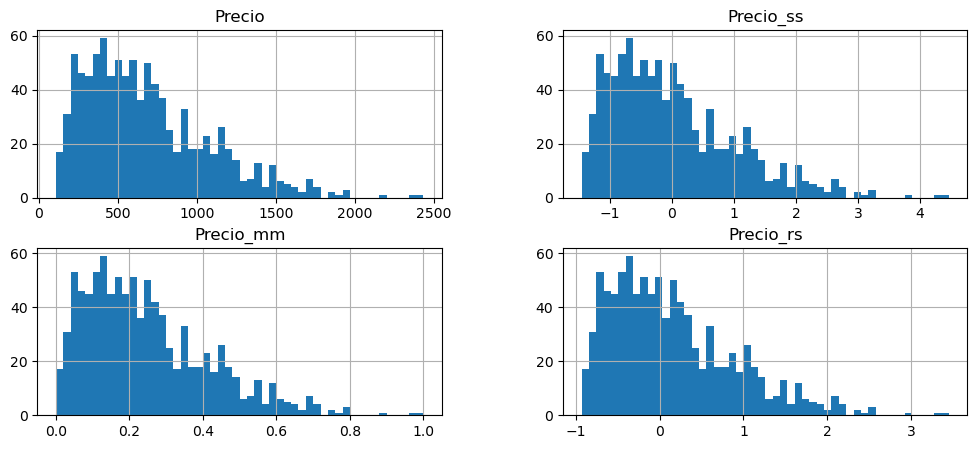

In [108]:
train[["Precio", "Precio_ss", "Precio_mm", "Precio_rs"]].hist(bins=50, figsize=(12,5));

In [109]:
train["Precio_log1p"] = np.log1p(train["Precio"])
train["Precio_ss_log1p"] = np.log1p(train["Precio_ss"])

C:\Windows\anaaaa\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [110]:
train[["Precio_log1p_ss"]] = ss.fit_transform(train[["Precio_log1p"]])

In [111]:
train[["Precio_ss", "Precio_ss_log1p", "Precio_log1p", "Precio_log1p_ss"]].describe().round(2)

,Precio_ss,Precio_ss_log1p,Precio_log1p,Precio_log1p_ss
count,948.00,807.00,948.00,948.00
mean,0.00,-0.22,6.35,-0.00
std,1.00,1.06,0.60,1.00
min,-1.46,-4.62,4.68,-2.76
25%,-0.77,-0.74,5.94,-0.68
50%,-0.20,-0.02,6.40,0.08
75%,0.58,0.56,6.81,0.76
max,4.47,1.70,7.80,2.39


In [112]:
train[["Precio_log1p_ss"]] = ss.fit_transform(train[["Precio_log1p"]])
train[["Precio_log1p_ss"]]

,Precio_log1p_ss
Id,
0,0.438676
1,-0.504460
2,-0.504460
3,-1.455986
4,-0.875616
...,...
945,-0.905250
946,0.241586
947,0.429805


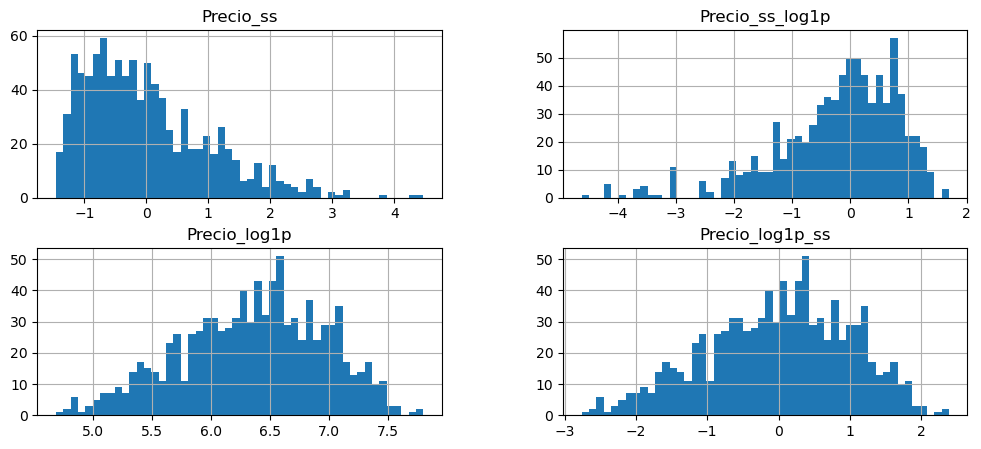

In [113]:
train[["Precio_ss", "Precio_ss_log1p", "Precio_log1p", "Precio_log1p_ss"]].hist(bins=50, figsize=(12,5));

## 인코딩

### One-Hot-Encoding

In [114]:
cate_cols = train.select_dtypes(exclude="number").columns.tolist()
cate_cols

['Fabricante', 'Tipo', 'ScreenResolution', 'CPU', 'Disco', 'GPU', 'OS']

In [115]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="if_binary", handle_unknown="ignore")
train_ohe = ohe.fit_transform(train.select_dtypes(exclude="number"))
test_ohe = ohe.transform(test.select_dtypes(exclude="number"))

print(train_ohe.shape, test_ohe.shape)

(948, 301) (350, 301)


C:\Windows\anaaaa\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [116]:
train.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            940, 941, 942, 943, 944, 945, 946, 947, 948, 949],
           dtype='int64', name='Id', length=948)

In [117]:
train_ohe.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
df_train_ohe = pd.DataFrame(train_ohe.toarray(), columns=ohe.get_feature_names_out())
df_train_ohe.index = train.index

df_test_ohe = pd.DataFrame(test_ohe.toarray(), columns=ohe.get_feature_names_out())
df_test_ohe.index = test.index

display(df_train_ohe.head(2))
display(df_test_ohe.head(2))

train.shape, df_train_ohe.shape, test.shape, df_test_ohe.shape

,Fabricante_Acer,Fabricante_Apple,Fabricante_Asus,Fabricante_Chuwi,Fabricante_Dell,Fabricante_Fujitsu,Fabricante_Google,Fabricante_HP,Fabricante_Huawei,Fabricante_LG,...,GPU_Nvidia Quadro M620,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Fabricante_Acer,Fabricante_Apple,Fabricante_Asus,Fabricante_Chuwi,Fabricante_Dell,Fabricante_Fujitsu,Fabricante_Google,Fabricante_HP,Fabricante_Huawei,Fabricante_LG,...,GPU_Nvidia Quadro M620,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS
Id,,,,,,,,,,,,,,,,,,,,,
950,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


((948, 17), (948, 301), (350, 10), (350, 301))

In [119]:
train_num = train.select_dtypes(include="number")
df_train = pd.concat([train_num, df_train_ohe], axis=1)
train.shape, df_train.shape

((948, 17), (948, 311))

In [120]:
test_num = test.select_dtypes(include="number")
df_test = pd.concat([test_num, df_test_ohe], axis=1)
test.shape, df_test.shape

((350, 10), (350, 304))

In [121]:
df_test.select_dtypes(exclude="number")[:2]

""
Id
950
951


## RandomForestRegressor

In [122]:
df_train_ohe.head(2)

,Fabricante_Acer,Fabricante_Apple,Fabricante_Asus,Fabricante_Chuwi,Fabricante_Dell,Fabricante_Fujitsu,Fabricante_Google,Fabricante_HP,Fabricante_Huawei,Fabricante_LG,...,GPU_Nvidia Quadro M620,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [123]:
X_train = df_train_ohe.loc[train.index]
X_test = df_test_ohe.loc[test.index]

print(X_train.shape, X_test.shape)
print(X_train.isnull().sum().sum(), X_test.isnull().sum().sum())

(948, 301) (350, 301)
0 0


In [124]:
label_name="Precio_log1p"
label_name

'Precio_log1p'

In [125]:
y_train = train["Precio_log1p"]
print(y_train.shape)
y_train.head(2)

(948,)


Id
0    6.617403
1    6.047372
Name: Precio_log1p, dtype: float64

In [126]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model

RandomForestRegressor(random_state=42)

In [127]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [128]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=kf, n_jobs=-1)
y_valid_predict

array([6.65068324, 6.18728365, 6.10260923, 5.52729904, 5.97263799,
       6.57119218, 6.47808079, 5.91799947, 5.14016545, 6.35765609,
       6.9614535 , 6.497246  , 6.38121728, 5.51753775, 5.1274162 ,
       6.67343227, 5.91142194, 5.38573233, 6.18951541, 6.36257816,
       6.30626228, 6.61364495, 5.93907308, 6.24280704, 7.1076533 ,
       6.81422247, 6.36060368, 6.73767818, 6.51519368, 6.91598385,
       5.90990036, 6.54020217, 6.43636406, 6.16811593, 5.16143125,
       6.67042718, 5.64588114, 6.50689419, 6.76479964, 6.15818508,
       6.00581186, 6.8049535 , 6.339643  , 5.52065992, 6.87483395,
       5.81701816, 6.13644898, 6.52952059, 5.56220838, 7.08103615,
       6.3474667 , 6.11981692, 6.92707414, 7.06951599, 6.97963731,
       7.01272608, 6.04867322, 6.06710818, 7.19076255, 6.9926072 ,
       7.03569498, 6.17605095, 6.03206334, 5.6781312 , 6.30538605,
       6.8787312 , 5.65465452, 5.57445369, 6.35472521, 6.4777994 ,
       6.58783725, 5.68013527, 5.5380671 , 6.31984958, 5.85745

In [129]:
mse = np.square(y_train - y_valid_predict).mean()
rmse = np.sqrt(mse)
rmse

0.27656716741154175

<AxesSubplot:xlabel='Precio_log1p'>

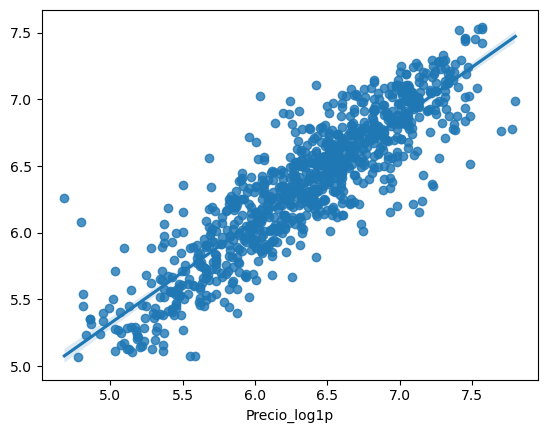

In [130]:
sns.regplot(x=y_train, y=y_valid_predict)

In [131]:
from sklearn.metrics import r2_score

r2_score(y_train, y_valid_predict)

0.7906111647628836

<AxesSubplot:xlabel='Precio_log1p', ylabel='Density'>

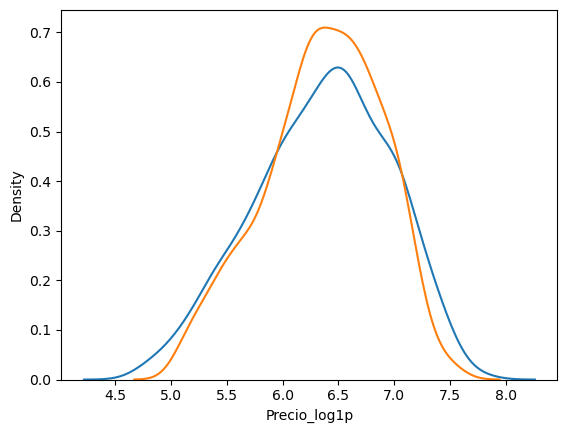

In [132]:
sns.kdeplot(y_train)
sns.kdeplot(y_valid_predict)

In [133]:
y_predict = model.fit(X_train, y_train).predict(X_test)
y_predict

array([5.91053074, 5.58772701, 6.7673334 , 6.74830751, 6.42037298,
       7.24319357, 6.06727506, 6.75846032, 7.13351011, 6.6981284 ,
       6.28557182, 5.60058867, 6.56950647, 6.65411216, 5.59693437,
       5.92561234, 6.68946438, 6.70765297, 6.50974028, 7.07495556,
       6.00288837, 5.98306308, 6.53457958, 5.67210349, 6.53872349,
       6.62949356, 5.46103085, 6.03031731, 6.59288157, 7.48459634,
       6.24605024, 5.7274666 , 6.05976603, 5.99927307, 6.90726901,
       5.50791684, 5.43191777, 6.54096892, 5.60058867, 7.1605156 ,
       5.19152532, 6.40597991, 7.34728452, 7.30050509, 5.84324375,
       6.47681202, 7.16577497, 7.4767215 , 5.48006616, 6.24764982,
       7.14013361, 6.56483207, 6.30133471, 5.11556457, 6.60884945,
       6.7773429 , 5.64926352, 6.85709706, 6.28952487, 6.12313971,
       5.76068801, 6.12918219, 6.60155837, 7.06478023, 5.88136763,
       6.91019739, 6.24534437, 6.60811451, 5.92584684, 5.11281107,
       6.09525047, 5.30967285, 6.80658256, 7.15297113, 5.65585

In [134]:
fi = pd.Series(model.feature_importances_)
fi.index = model.feature_names_in_
fi.nlargest(20)

Tipo_Notebook                      0.286360
ScreenResolution_1366x768          0.149666
GPU_Intel HD Graphics 400          0.057346
Disco_32GB Flash Storage           0.030507
Disco_256GB SSD                    0.027036
GPU_Intel HD Graphics 500          0.024486
GPU_Nvidia GeForce GTX 1070        0.022359
Disco_512GB SSD                    0.021475
GPU_Intel HD Graphics 620          0.018743
CPU_Intel Core i3 6006U 2GHz       0.014657
Disco_1TB HDD                      0.014640
Tipo_Netbook                       0.013270
GPU_Intel HD Graphics 520          0.010612
Disco_1TB SSD                      0.008768
CPU_Intel Core i5 6200U 2.3GHz     0.008602
Fabricante_HP                      0.008073
CPU_Intel Core i7 7500U 2.7GHz     0.008037
GPU_Nvidia GeForce GTX 1050        0.007999
CPU_Intel Core i7 7700HQ 2.8GHz    0.007857
OS_Windows 10                      0.007233
dtype: float64

<AxesSubplot:>

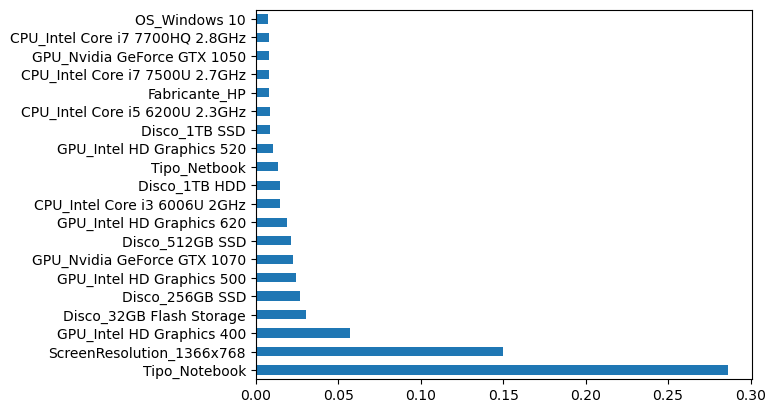

In [135]:
fi.nlargest(20).plot.barh()

In [136]:
sub["Precio"] = np.expm1(y_predict)

In [137]:
file_name = f"data/laptop/submission_{rmse:.5f}.csv"
file_name

'data/laptop/submission_0.27657.csv'

In [138]:
file_name = f"data/laptop/submission_{rmse:.5f}.csv"
file_name

'data/laptop/submission_0.27657.csv'